In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai import *
from fastai.vision import *

In [7]:
bs = 64
import os
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
path = Path('gdrive/My Drive/FASTAI /datafolderv2')

In [0]:
np.random.seed(42)

In [0]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(max_zoom=0, max_warp = None), size=224, bs=bs).normalize(imagenet_stats)

In [0]:
data.show_batch(rows = 3, figsize = (7,8))

##RESNET50 wd=Stock(.01)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics = error_rate, wd = .01)

In [43]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64, 256, kernel_s

epoch,train_loss,valid_loss,error_rate,time
0,1.905731,1.618312,0.726496,00:31
1,1.733050,1.799232,0.717949,00:31
2,1.577095,1.906645,0.688034,00:32
3,1.426713,2.161541,0.675214,00:30
4,1.314421,1.912160,0.649573,00:31
5,1.236842,1.819280,0.658120,00:32
6,1.146590,1.757020,0.632479,00:30
7,1.070873,1.803999,0.645299,00:32
8,0.999163,1.769921,0.645299,00:30
9,0.944274,1.941639,0.675214,00:30


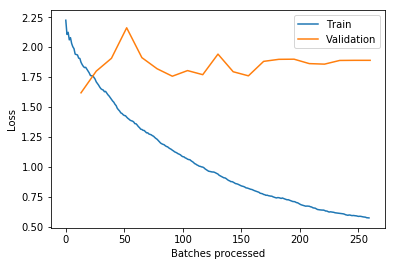

In [44]:
learn.fit_one_cycle(20)
learn.recorder.plot_losses()

In [0]:
learn.save('Run1-Stage1')

In [17]:
learn.unfreeze

<bound method Learner.unfreeze of Learner(data=ImageDataBunch;

Train: LabelList (858 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Quality5,Quality5,Quality5,Quality5,Quality5
Path: gdrive/My Drive/FASTAI /datafolderv2;

Valid: LabelList (234 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Quality1,Quality1,Quality1,Quality1,Quality1
Path: gdrive/My Drive/FASTAI /datafolderv2;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1)

In [19]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.51E-05


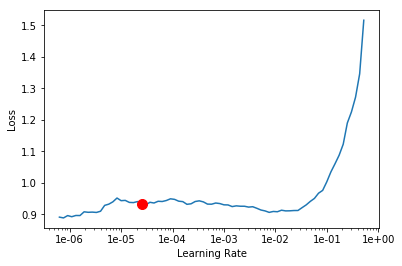

In [20]:
learn.recorder.plot(suggestion = True)

epoch,train_loss,valid_loss,error_rate,time
0,0.917003,1.830645,0.636752,00:30
1,0.917279,1.847723,0.645299,00:32
2,0.911613,1.829928,0.645299,00:31
3,0.922793,1.848354,0.636752,00:31
4,0.931988,1.823858,0.636752,00:30
5,0.924312,1.818982,0.628205,00:30
6,0.930967,1.812586,0.632479,00:31
7,0.934165,1.807689,0.636752,00:30
8,0.922972,1.809428,0.628205,00:31
9,0.925142,1.813348,0.632479,00:31


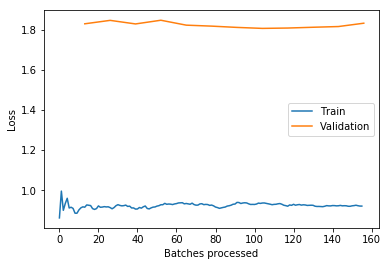

In [21]:
learn.fit_one_cycle(12, max_lr=slice(1e-05,3e-05))
learn.recorder.plot_losses()

In [0]:
learn.save("Run1-Stage2")

In [25]:
learn.fit_one_cycle(6)
learn.recorder.plot_losses()

epoch,train_loss,valid_loss,error_rate,time
0,0.918161,1.835685,0.602564,00:29
1,0.900027,1.895102,0.666667,00:31
2,0.892999,1.997199,0.692308,00:29
3,0.849466,1.923684,0.658120,00:29
4,0.813078,1.845285,0.611111,00:31


KeyboardInterrupt: ignored

In [0]:
learn.save("Run1-Stage3")

In [27]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

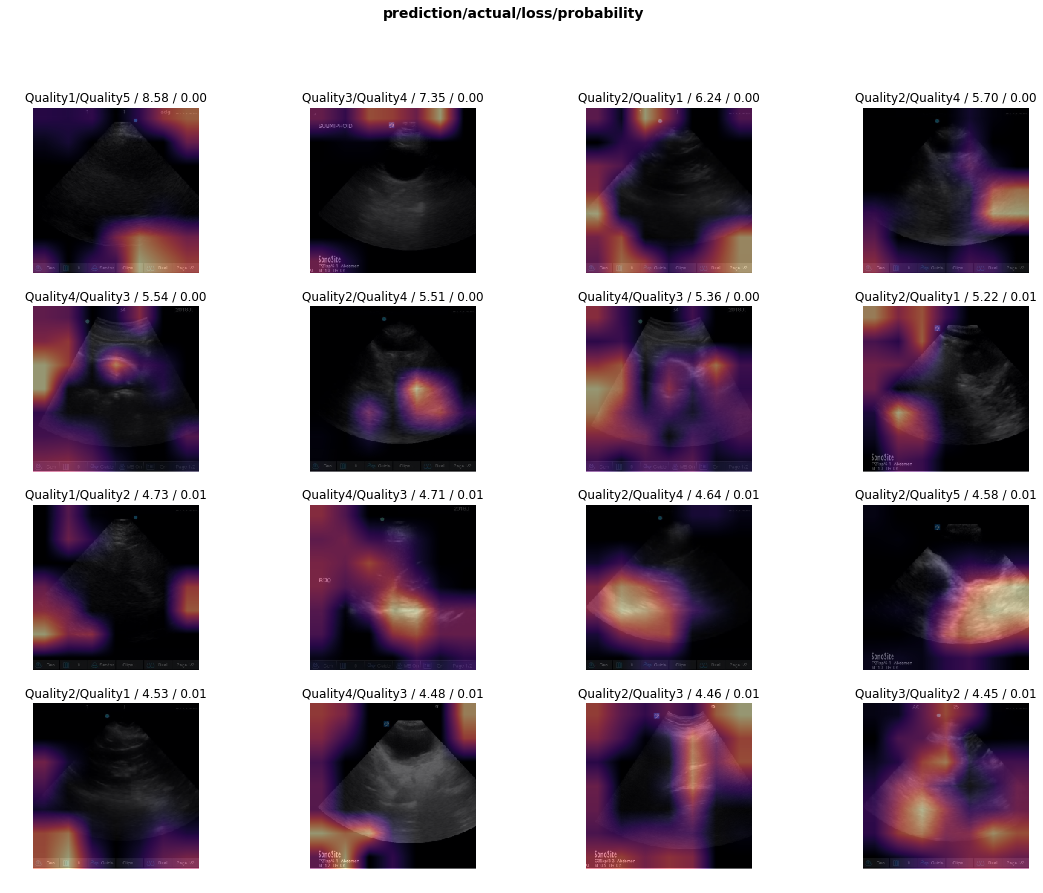

In [28]:
interp.plot_top_losses(16, figsize=(19, 14))

##Resnet50 wd = .03

In [0]:
learn = cnn_learner(data, models.resnet50, metrics = error_rate, wd = .03)

In [47]:
learn.fit_one_cycle(15)
learn.recorder.plot_losses()

epoch,train_loss,valid_loss,error_rate,time
0,1.867435,1.574237,0.683761,00:32
1,1.695092,1.761624,0.666667,00:31
2,1.537969,1.944736,0.683761,00:31
3,1.402019,1.938240,0.696581,00:30
4,1.302377,1.814477,0.632479,00:31
5,1.189699,1.883859,0.666667,00:31
6,1.093101,1.852100,0.696581,00:30
7,1.020983,1.825638,0.636752,00:32
8,0.955085,1.756355,0.628205,00:31
9,0.890238,1.820626,0.632479,00:31


KeyboardInterrupt: ignored

In [1]:
learn.recorder.plot_losses()

NameError: ignored

In [0]:
learn.save('Run2-Stage1')

In [33]:
learn.unfreeze

<bound method Learner.unfreeze of Learner(data=ImageDataBunch;

Train: LabelList (858 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Quality5,Quality5,Quality5,Quality5,Quality5
Path: gdrive/My Drive/FASTAI /datafolderv2;

Valid: LabelList (234 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Quality1,Quality1,Quality1,Quality1,Quality1
Path: gdrive/My Drive/FASTAI /datafolderv2;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1)

In [35]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 4.79E-06


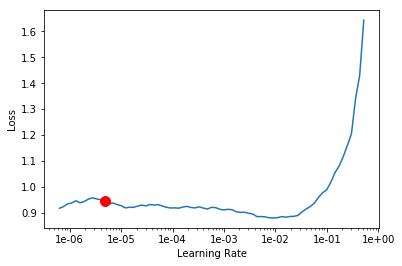

In [37]:
learn.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,error_rate,time
0,0.921352,1.828992,0.632479,00:31
1,0.935145,1.830898,0.636752,00:29
2,0.939285,1.822981,0.628205,00:29
3,0.941041,1.837697,0.628205,00:32
4,0.944587,1.842014,0.632479,00:29
5,0.934950,1.828593,0.628205,00:32
6,0.932936,1.826058,0.623932,00:29
7,0.927466,1.827142,0.632479,00:29
8,0.918073,1.824871,0.623932,00:31
9,0.923872,1.832085,0.628205,00:29


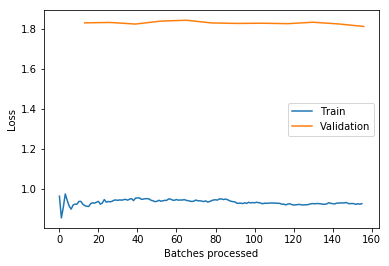

In [38]:
learn.fit_one_cycle(12, max_lr=slice(2e-06,1e-05))
learn.recorder.plot_losses()